In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score


df = pd.read_csv("pima_diabetes.csv")

X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values   


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Training Set: (613, 8) (613,)
Testing Set: (154, 8) (154,)


In [5]:
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid'
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_cv = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, verbose=0)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = cross_val_score(model_cv, X, y, cv=kfold)

print(f"Cross-Validation Accuracy: {cv_results.mean():.4f} ± {cv_results.std():.4f}")

Cross-Validation Accuracy: 0.7745 ± 0.0488


In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {accuracy:.4f}")

Train on 613 samples, validate on 154 samples
Epoch 1/50
613/613 [==============================] - 1s 1ms/sample - loss: 0.7036 - acc: 0.6036 - val_loss: 0.6711 - val_acc: 0.6558
Epoch 2/50
613/613 [==============================] - 0s 152us/sample - loss: 0.6308 - acc: 0.6395 - val_loss: 0.6189 - val_acc: 0.6429
Epoch 3/50
613/613 [==============================] - 0s 157us/sample - loss: 0.5805 - acc: 0.6672 - val_loss: 0.5858 - val_acc: 0.6623
Epoch 4/50
613/613 [==============================] - 0s 149us/sample - loss: 0.5454 - acc: 0.7308 - val_loss: 0.5598 - val_acc: 0.7143
Epoch 5/50
613/613 [==============================] - 0s 153us/sample - loss: 0.5208 - acc: 0.7488 - val_loss: 0.5427 - val_acc: 0.7013
Epoch 6/50
613/613 [==============================] - 0s 195us/sample - loss: 0.5037 - acc: 0.7684 - val_loss: 0.5280 - val_acc: 0.7013
Epoch 7/50
613/613 [==============================] - 0s 183us/sample - loss: 0.4919 - acc: 0.7798 - val_loss: 0.5184 - val_acc: 0.7013
Epoc

ERROR! Session/line number was not unique in database. History logging moved to new session 17


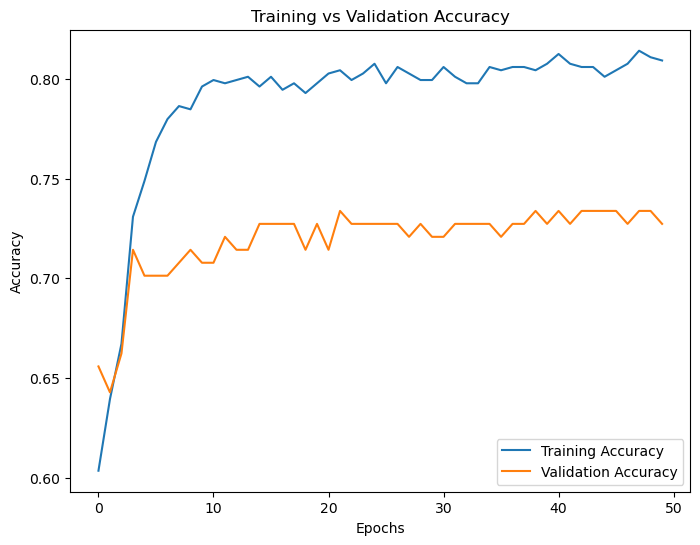

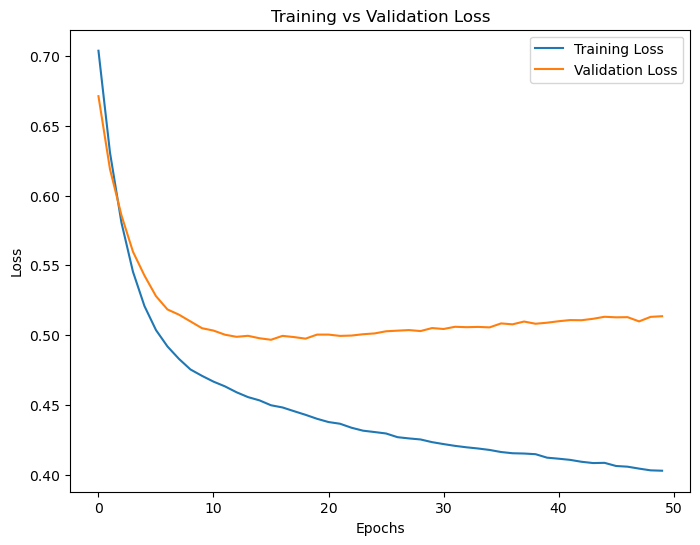

In [8]:
import matplotlib.pyplot as plt

available_keys = history.history.keys()

accuracy_key = 'accuracy' if 'accuracy' in available_keys else 'acc'
val_accuracy_key = 'val_accuracy' if 'val_accuracy' in available_keys else 'val_acc'

plt.figure(figsize=(8,6))
plt.plot(history.history[accuracy_key], label="Training Accuracy")
plt.plot(history.history[val_accuracy_key], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()